In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Caso 

Vamos implementar o neurônio sem aprendizado, passando os pesos previamente conhecidos

In [2]:
# criando um dataset ficticio
dataset = np.array([[1,1,1], [-1,-1,0]])
df = pd.DataFrame(dataset, columns=['var_1', 'var_2', 'classe'])
df

,var_1,var_2,classe
0,1,1,1
1,-1,-1,0


In [3]:
# separando as classes para o plot 
classe_1 = df[0:1]
classe_0 = df[1:]

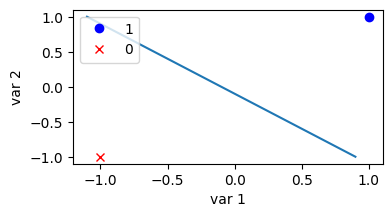

In [4]:
# criando uma reta qualquer para separar os pontos
y = np.array(list(range(10,-11, -1)))/10
x = np.array(list(range(-11,10)))/10

#plot points where blue o's denote classe 1 & red x's denote classe 0
plt.figure(figsize=(4,2))
plt.plot(classe_1['var_1'], classe_1['var_2'], "bo", label="1")
plt.plot(classe_0['var_1'], classe_0['var_2'], "rx", label="0")
plt.plot(x, y, '-')
plt.xlabel("var 1")
plt.ylabel("var 2")
plt.legend(loc='upper left')
plt.show();

In [5]:
# separando os dados em variáveis de entrada e target
X = df[['var_1', 'var_2']]
y = df[['classe']]

In [6]:
# ja sabemos os pesos
pesos = [-0.5, 1, 0.5]

In [7]:
def perceptron(row, pesos):
    ativacao = pesos[0]
    for j in range(0, len(row)):
        ativacao += pesos[j+1] * row[j]
    return 1 if ativacao >=1  else 0    

In [8]:
predict = []
for i in range(0,len(X)):
    predict.append(perceptron(X.iloc[i], pesos))

In [9]:
print('Predido: ', predict, 'Esperado: ', y.values.tolist())

Predido:  [1, 0] Esperado:  [[1], [0]]


# Caso  

Vamos calcular os pesos de acordo com as entradas 

In [10]:
df = pd.DataFrame(np.array([[0,0,0],[0,1,1], [1,0,1], [1,1,1]]), columns=['var1','var2', 'classe'])
df

,var1,var2,classe
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
# separando os dados em variáveis de entrada e target
X = df[['var1', 'var2']]
y = df['classe']

In [12]:
# formatando as entradas, inicializando os pesos e a taxa de aprendizagem
entradas = np.array(X)
saidas = np.array(y)
pesos = np.array([0.0, 0.0])
taxaAprendizagem = 0.1

In [13]:
# função que receberá os valores e fará a predição
def perceptron_predict(row, pesos):
    saida = soma(row, pesos)
    return step(saida)

In [14]:
# função que combina linearmente entradas e pesos
def soma(row, pesos):
    soma = row.dot(pesos) # é o mesmo que multiplicar 1 por 1, como fizemos acima usando um for
    return soma

In [15]:
# função de ativação step
def step(soma):
    if (soma >= 1):
        return 1
    return 0

In [16]:
def perceptron_fit(entradas, saidas, pesos, taxaAprendizagem ):
    erroTotal = None
    #enquanto o erro não for igual à 0 (zero)
    while (erroTotal != 0):
        erroTotal = 0
        #faça o ajuste dos pesos para cada uma das nossas classes
        for i in range(len(saidas)):
            saidaCalculada = perceptron_predict(np.asarray(entradas[i]), pesos)
            #Calcula o erro da nossa classificação
            erro = saidas[i] - saidaCalculada
            erroTotal += erro
            #para cada um dos pesos: atualize o valor dele com base no nosso erro
            for j in range(len(pesos)):
                pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
                print('Peso atualizado: ' + str(pesos[j]))
        print('Total de erros: ' + str(erroTotal))
    return pesos

In [17]:
pesos = perceptron_fit(entradas, saidas, pesos, taxaAprendizagem)
print('Rede neural treinada')

Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.0
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.1
Peso atualizado: 0.2
Peso atualizado: 0.2
Total de erros: 3
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.2
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.30000000000000004
Peso atualizado: 0.4
Peso atualizado: 0.4
Total de erros: 3
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.4
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Total de erros: 2
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.5
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Total de erros: 2
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.6
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Peso atualizado: 0.7
Total de erros: 2
Peso atualizado: 0.7
P

In [18]:
print(perceptron_predict(entradas[0], pesos))
print(perceptron_predict(entradas[1],pesos))
print(perceptron_predict(entradas[2], pesos))
print(perceptron_predict(entradas[3], pesos))

0
1
1
1


# Caso

Vamos aplicar a um caso mais proximo da realidade?

In [27]:
# leitura do dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#vamos usar apenas duas classes, setosas e versicolor
setosa = np.array(df.iloc[0:50, [0,2]])
versicolor = np.array(df.iloc[50:100, [0,2]])

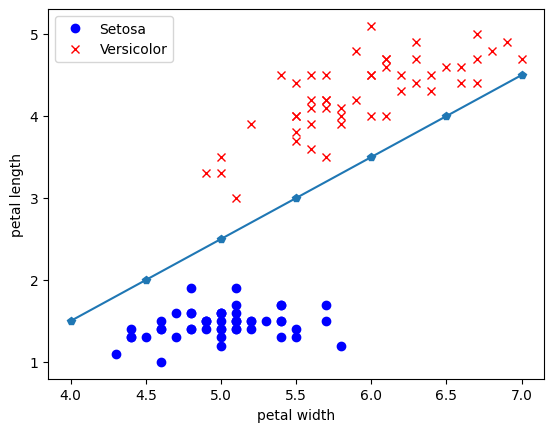

In [19]:
# criando uma reta qualquer para separar os pontos
y = np.arange (1.5, 5, 0.5)
x = np.arange (4, 7.5, 0.5)

#plot onde azul denota setosa e red denota versicolor
plt.plot(setosa[:, 0], setosa[:, 1], "bo", label="Setosa")
plt.plot(versicolor[:, 0], versicolor[:, 1], "rx", label="Versicolor")
plt.plot(x, y, 'p-')

plt.xlabel("petal width")
plt.ylabel("petal length")
plt.legend(loc='upper left')
plt.show()

In [20]:
# separando os dados em variáveis de entrada e target
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [21]:
# inicializando os pesos e a taxa de aprendizagem
pesos = np.array([0.0, 0.0])
taxaAprendizagem = 0.1

In [22]:
# modificando a função de ativacao 
def step(soma):
    if (soma >= 0):
        return 1
    return -1

In [23]:
def perceptron_fit(entradas, saidas, pesos, taxaAprendizagem, niter=10 ):
    erroTotal = None
    max_iter = 0
    #enquanto o erro não for igual à 0 (zero) ou o numero de iterações não for o max
    while ((erroTotal != 0) or (max_iter < niter)):
        erroTotal = 0
        #faça o ajuste dos pesos para cada uma das nossas classes
        for i in range(len(saidas)):
            saidaCalculada = perceptron_predict(np.asarray(entradas[i]), pesos)
            #Calcula o erro da nossa classificação
            erro = saidas[i] - saidaCalculada
            erroTotal += erro
            #para cada um dos pesos: atualize o valor dele com base no nosso erro
            for j in range(len(pesos)):
                pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
                print('Peso atualizado: ' + str(pesos[j]))
                print('Niter', max_iter)
        print('Total de erros: ' + str(erroTotal))
        max_iter = max_iter +1
    return pesos

In [24]:
pesos = perceptron_fit(X, y, pesos, taxaAprendizagem, niter=8)
print('Rede neural treinada')

Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0
Peso atualizado: -1.02
Niter 0
Peso atualizado: -0.27999999999999997
Niter 0

Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.7000000000000002
Niter 2
Peso atualizado: 0.16000000000000036
Niter 2
Peso atualizado: 1.70

Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualizado: 1.7400000000000004
Niter 4
Peso atualizado: -0.8599999999999997
Niter 4
Peso atualiza

Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualizado: 1.7400000000000004
Niter 6
Peso atualizado: -0.8599999999999997
Niter 6
Peso atualiza

Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8599999999999997
Niter 7
Peso atualizado: 1.7400000000000004
Niter 7
Peso atualizado: -0.8

In [32]:
X[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),)

In [25]:
print(perceptron_predict(X[0], pesos))
print(y[0])

-1
-1


# Caso 

Usando o sklearn 

In [28]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

clf.score(X, y)

/home/walkiria/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


0.9393433500278241

In [34]:
X[[0]]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [37]:
print('Predito:', clf.predict(X[[0]]))
print('Real:',y[0])

Predito: [0]
Real: 0
